In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn import preprocessing
from sklearn import metrics

In [4]:
from google.colab import files
uploaded=files.upload()

Saving Company_Data (2).csv to Company_Data (2) (1).csv


In [5]:
df=pd.read_csv("Company_Data (2).csv")
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [6]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [7]:
df['US']=encoder.fit_transform(df['US'])
df['ShelveLoc']=encoder.fit_transform(df['ShelveLoc'])
# replace function for urban
df['Urban']=df['Urban'].replace(['Yes','No'],[1,0])

In [8]:
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1
396,6.14,139,23,3,37,120,2,55,11,0,1
397,7.41,162,26,12,368,159,2,40,18,1,1
398,5.94,100,79,7,284,95,0,50,12,1,1


In [9]:
df['Sales'].describe()

count    400.000000
mean       7.496325
std        2.824115
min        0.000000
25%        5.390000
50%        7.490000
75%        9.320000
max       16.270000
Name: Sales, dtype: float64

In [10]:
df['Sales'] = pd.cut(df['Sales'], bins=[0,5.42,10.84,17], labels=[0,1,2])
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,1,138,73,11,276,120,0,42,17,1,1
1,2,111,48,16,260,83,1,65,10,1,1
2,1,113,35,10,269,80,2,59,12,1,1
3,1,117,100,4,466,97,2,55,14,1,1
4,0,141,64,3,340,128,0,38,13,1,0


In [11]:
df.dtypes

Sales          category
CompPrice         int64
Income            int64
Advertising       int64
Population        int64
Price             int64
ShelveLoc         int64
Age               int64
Education         int64
Urban             int64
US                int64
dtype: object

In [12]:
df.isnull().sum()

Sales          1
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [13]:
df.dropna(inplace=True)

In [14]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,1,138,73,11,276,120,0,42,17,1,1
1,2,111,48,16,260,83,1,65,10,1,1
2,1,113,35,10,269,80,2,59,12,1,1
3,1,117,100,4,466,97,2,55,14,1,1
4,0,141,64,3,340,128,0,38,13,1,0


In [15]:
df['Sales'] = df['Sales'].astype(int)

In [16]:
#for i in range(0,400):
    #if df.ShelveLoc[i]=='Bad':
        #df.ShelveLoc[i]=0
   # elif df.ShelveLoc[i]=='Good':
        #df.ShelveLoc[i]=1
    #else:
        #df.ShelveLoc[i]=2

In [17]:
X=df.iloc[:,1:]
Y=df.iloc[:,0]

In [18]:
X

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1
396,139,23,3,37,120,2,55,11,0,1
397,162,26,12,368,159,2,40,18,1,1
398,100,79,7,284,95,0,50,12,1,1


In [19]:
Y

0      1
1      2
2      1
3      1
4      0
      ..
395    2
396    1
397    1
398    1
399    1
Name: Sales, Length: 399, dtype: int64

In [20]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=12)

In [21]:
dt=DecisionTreeClassifier(criterion='gini',min_samples_split=8,random_state=12)

In [22]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(min_samples_split=8, random_state=12)

In [23]:
y_test_pred=dt.predict(x_test)
y_test_pred

array([1, 1, 2, 2, 1, 1, 0, 1, 1, 2, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       2, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 2,
       0, 1, 1, 1, 0, 1, 2, 1, 1, 1, 0, 0, 1, 0])

In [24]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.42      0.52      0.47        21
           1       0.67      0.65      0.66        49
           2       0.50      0.30      0.37        10

    accuracy                           0.57        80
   macro avg       0.53      0.49      0.50        80
weighted avg       0.58      0.57      0.57        80



In [25]:
score=cross_val_score(dt,x_train,y_train,cv=10)
score.mean()

0.6737903225806452

In [26]:
y_test_pred.dtype

dtype('int64')

In [27]:
metrics.mean_absolute_error(y_test_pred,y_test)

0.4375

In [28]:
metrics.mean_absolute_percentage_error(y_test_pred,y_test)

844424930131968.2

In [29]:
metrics.mean_squared_error(y_test_pred,y_test)

0.4625

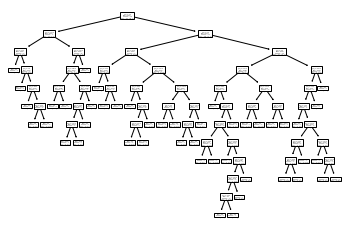

In [30]:
tree.plot_tree(dt)
plt.show()

In [31]:
df.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

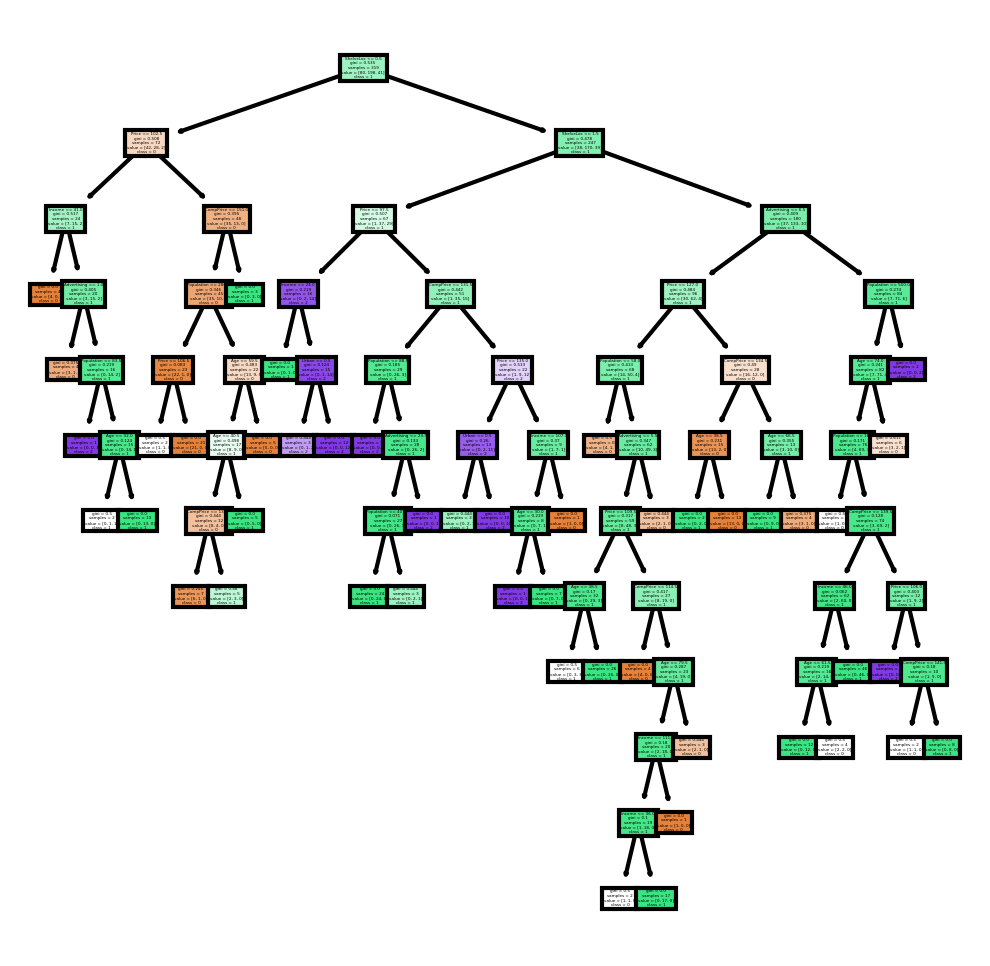

In [32]:
fn=['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US']
cn=['0','1','2']
fig,axes=plt.subplots(figsize = (4,4), dpi=300)
tree.plot_tree(dt, feature_names = fn, class_names=cn, filled = True)
plt.show()